In [1]:
from Simulation import Simulation
from modules.Particle import Particle
from modules.Propagation import Propagation
from modules.Source import Source
from modules.Observer import Observer
from modules.Plotter import Plotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
### see the previous tutorials for details on each module
def sim(propagation):
    simulation = Simulation()
    ### source
    gyro_radius = 30.0
    diffusion_tensor = np.array([1.0, 1.0, 100.0], dtype=np.float32)
    source_position = np.zeros(3, dtype=np.float32)
    nr_particles = 500
    source = Source(nr_particles, source_position, gyro_radius, diffusion_tensor)
    simulation.add_particles(source)

    ### observer
    observer = Observer()
    detailed_range = 500 # observe the initial 500 steps (default = 0)
    observer_resolution = 500 # also observe each 500th step (default = 1)
    observer.change_observer_resolution(detailed_range, observer_resolution)
    simulation.add_observer(observer)
    
    steps = 10**4
    t_max = 10**4
    time = np.linspace(1, t_max, steps, dtype=np.float32)

    simulation.add_propagation(propagation, time)
    data = simulation.run_simulation()
    return data

In [3]:
### see the previous tutorials for details on how to calculate the diffusion coefficients
def analyze(data):
    nr_particles = 500
    x = data[2]
    z = data[4]
    t = data[1]
    times = []
    kappa_xx = []
    kappa_zz = []
    for j in range(int(len(x)/nr_particles)):
        t_j = t[j*nr_particles]
        kappa_xx_current = 0
        kappa_zz_current = 0
        for i in range(nr_particles):
            x_i = x[j*nr_particles+i]
            z_i = z[j*nr_particles+i]
            kappa_xx_current = kappa_xx_current + x_i**2
            kappa_zz_current = kappa_zz_current + z_i**2
        kappa_xx.append(kappa_xx_current/(2*t_j))
        kappa_zz.append(kappa_zz_current/(2*t_j))
        times.append(t_j)
        
    plt.scatter(times, kappa_xx, label='$x$')
    plt.scatter(times, kappa_zz, label='$z$')
    plt.legend()
    plt.loglog()
    plt.show()

### Propagation Module

Add the propagation module that you want to use:

- **random walk**: Fast method that propagates individual particles along random walks. The overall behaviour is governed by a generalized telegraph equation: $\frac{\partial f}{\partial t} = \sum_i \tau_i \frac{\partial^2 f}{\partial t^2} = \sum_i \kappa_i \frac{\partial^2 f}{\partial x_i^2}$
- others coming soon...

init simulation completed
init observer completed


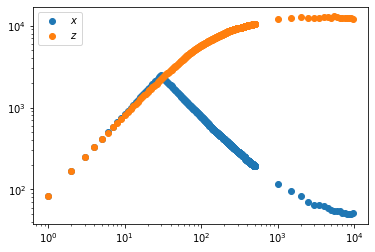

In [4]:
step_size = 1.0
propagation = Propagation(step_size)
data = sim(propagation)
analyze(data)

init simulation completed
init observer completed


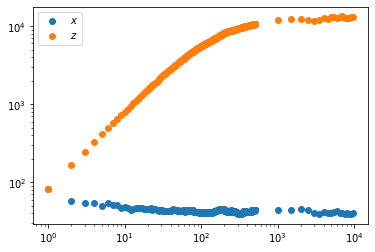

In [5]:
step_size = 1.0
propagation = Propagation(step_size)
nr_fixed_gyro_radii = 0
propagation.set_nr_fixed_gyro_radii(nr_fixed_gyro_radii)
data = sim(propagation)
analyze(data)

In [ ]:
step_size = 1.0
propagation = Propagation(step_size)
chi = np.array([1.0, 1.0, 3.0], dtype=np.float32)
normalized_chi = chi/np.abs(chi)
propagation.set_normalized_chi(normalized_chi)
nr_fixed_gyro_radii = 0
propagation.set_nr_fixed_gyro_radii(nr_fixed_gyro_radii)
data = sim(propagation)
analyze(data)

init simulation completed
init observer completed
